<a href="https://colab.research.google.com/github/seongs/ML/blob/main/S3E3_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [545]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/kaggle/playground-series-s3e3/train.csv')
test = pd.read_csv('/content/drive/MyDrive/kaggle/playground-series-s3e3/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/kaggle/playground-series-s3e3/sample_submission.csv')

train.shape, test.shape, submission.shape

((1677, 35), (1119, 34), (1119, 2))

In [546]:
import pandas as pd
from pathlib import Path
import numpy as np

In [547]:
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [548]:
train.shape, test.shape

((1677, 35), (1119, 34))

In [549]:
train.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [550]:
train.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [551]:
cate_cols = []
for column in train.columns:
    if train[column].dtype == 'object':
        cate_cols.append(column)

cate_cols,len(cate_cols)

(['BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'],
 8)

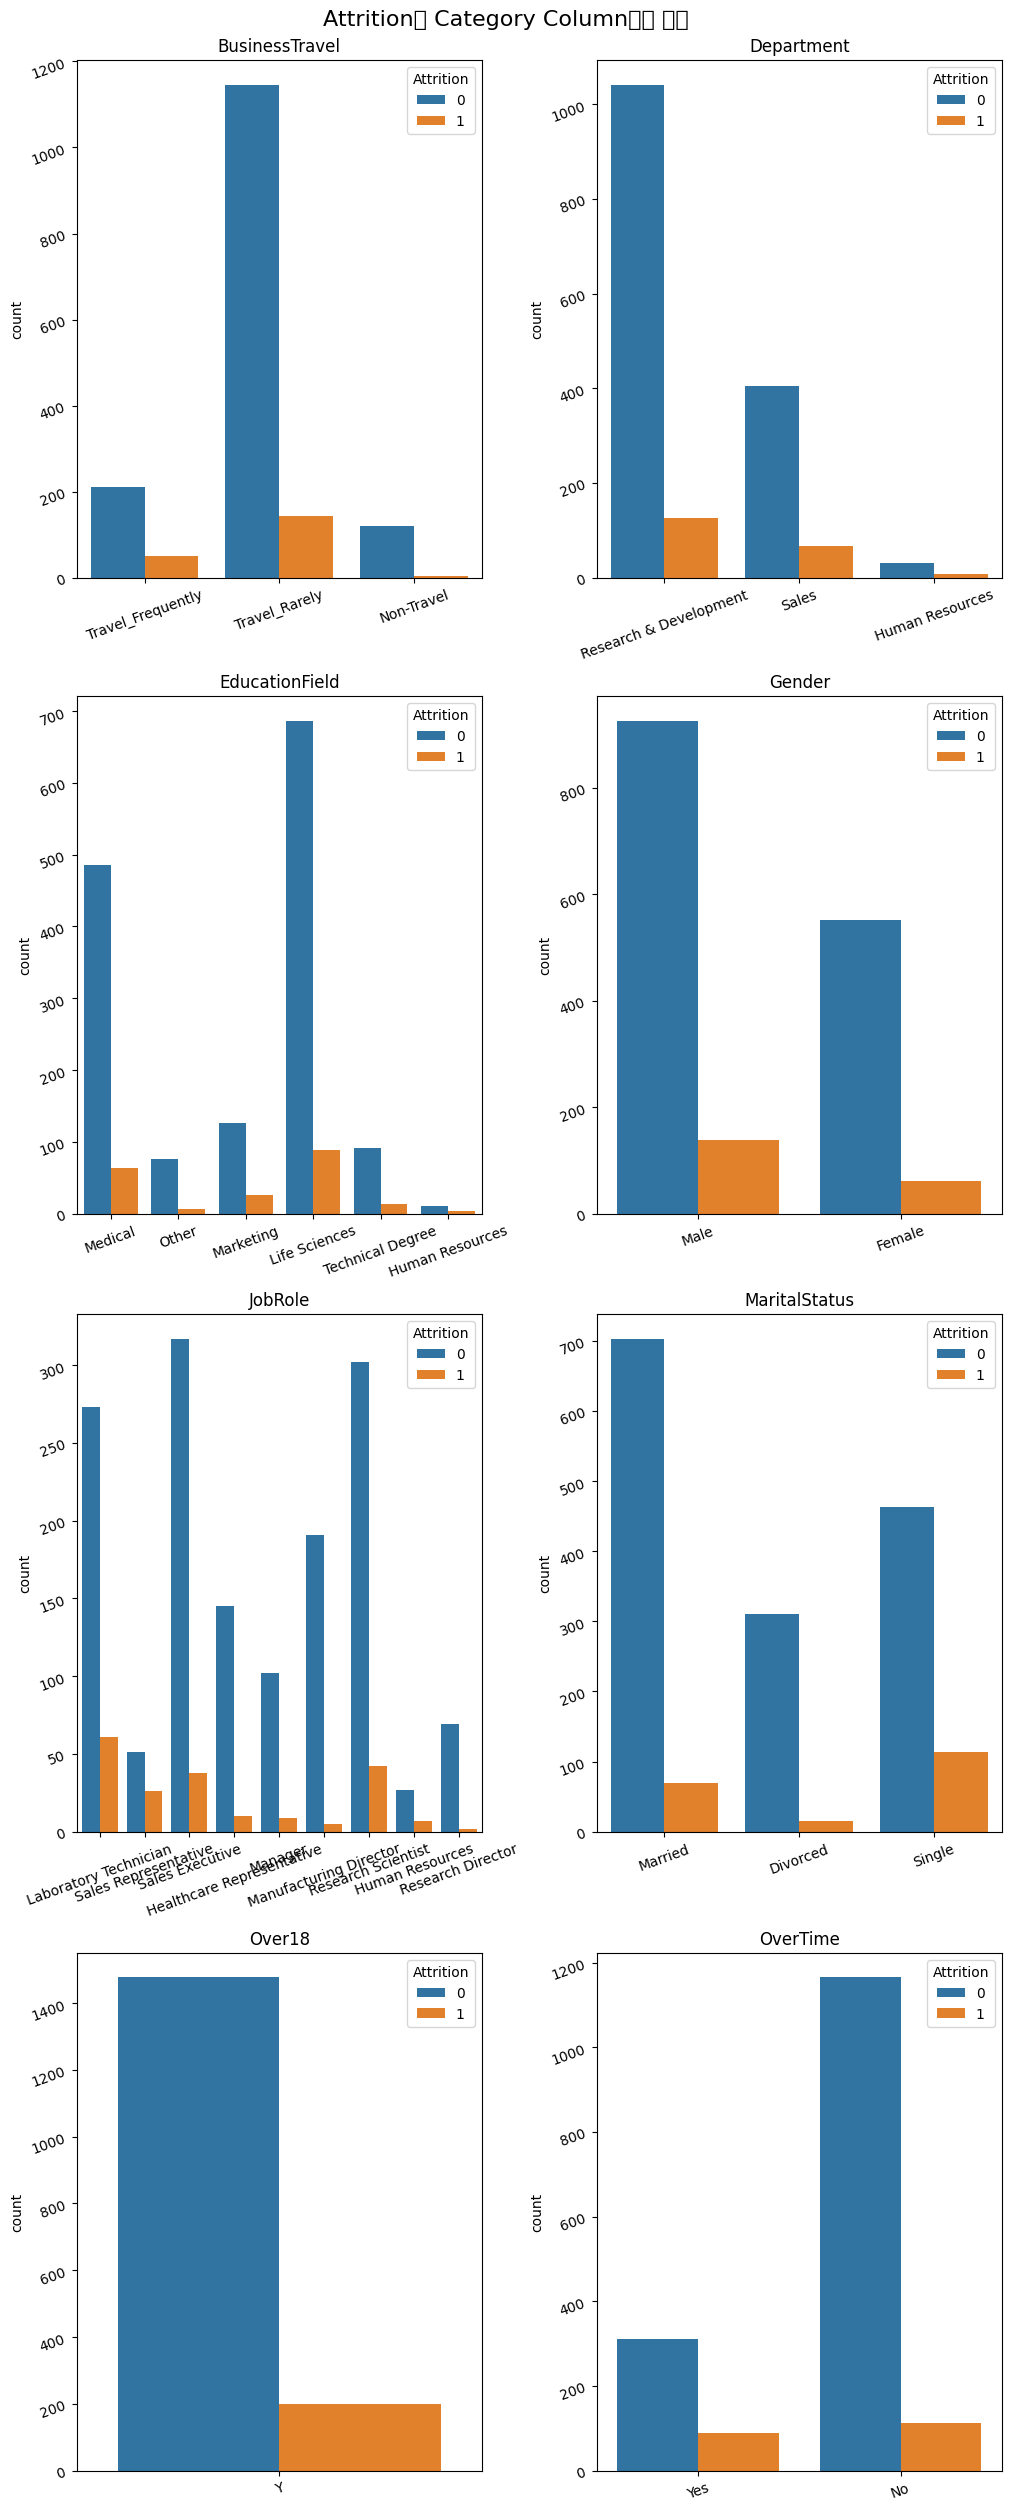

In [552]:
fig, ax = plt.subplots(4, 2, figsize=(10, 25), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Attrition과 Category Column들의 분포', fontsize=16)

for i in range(len(cate_cols)):
    sns.countplot(x=cate_cols[i], data=train,
                      hue='Attrition', ax=ax[i]).set(xlabel = None)
    ax[i].set(title = cate_cols[i])

    if train[cate_cols[1]].nunique() >= 3:
        ax[i].tick_params(labelrotation=20)

plt.show()

In [553]:
cont_cols = []
for column in train.columns:
    if train[column].dtype != object:
        cont_cols.append(column)

In [554]:
cont_cols,len(cont_cols)

(['id',
  'Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager',
  'Attrition'],
 27)

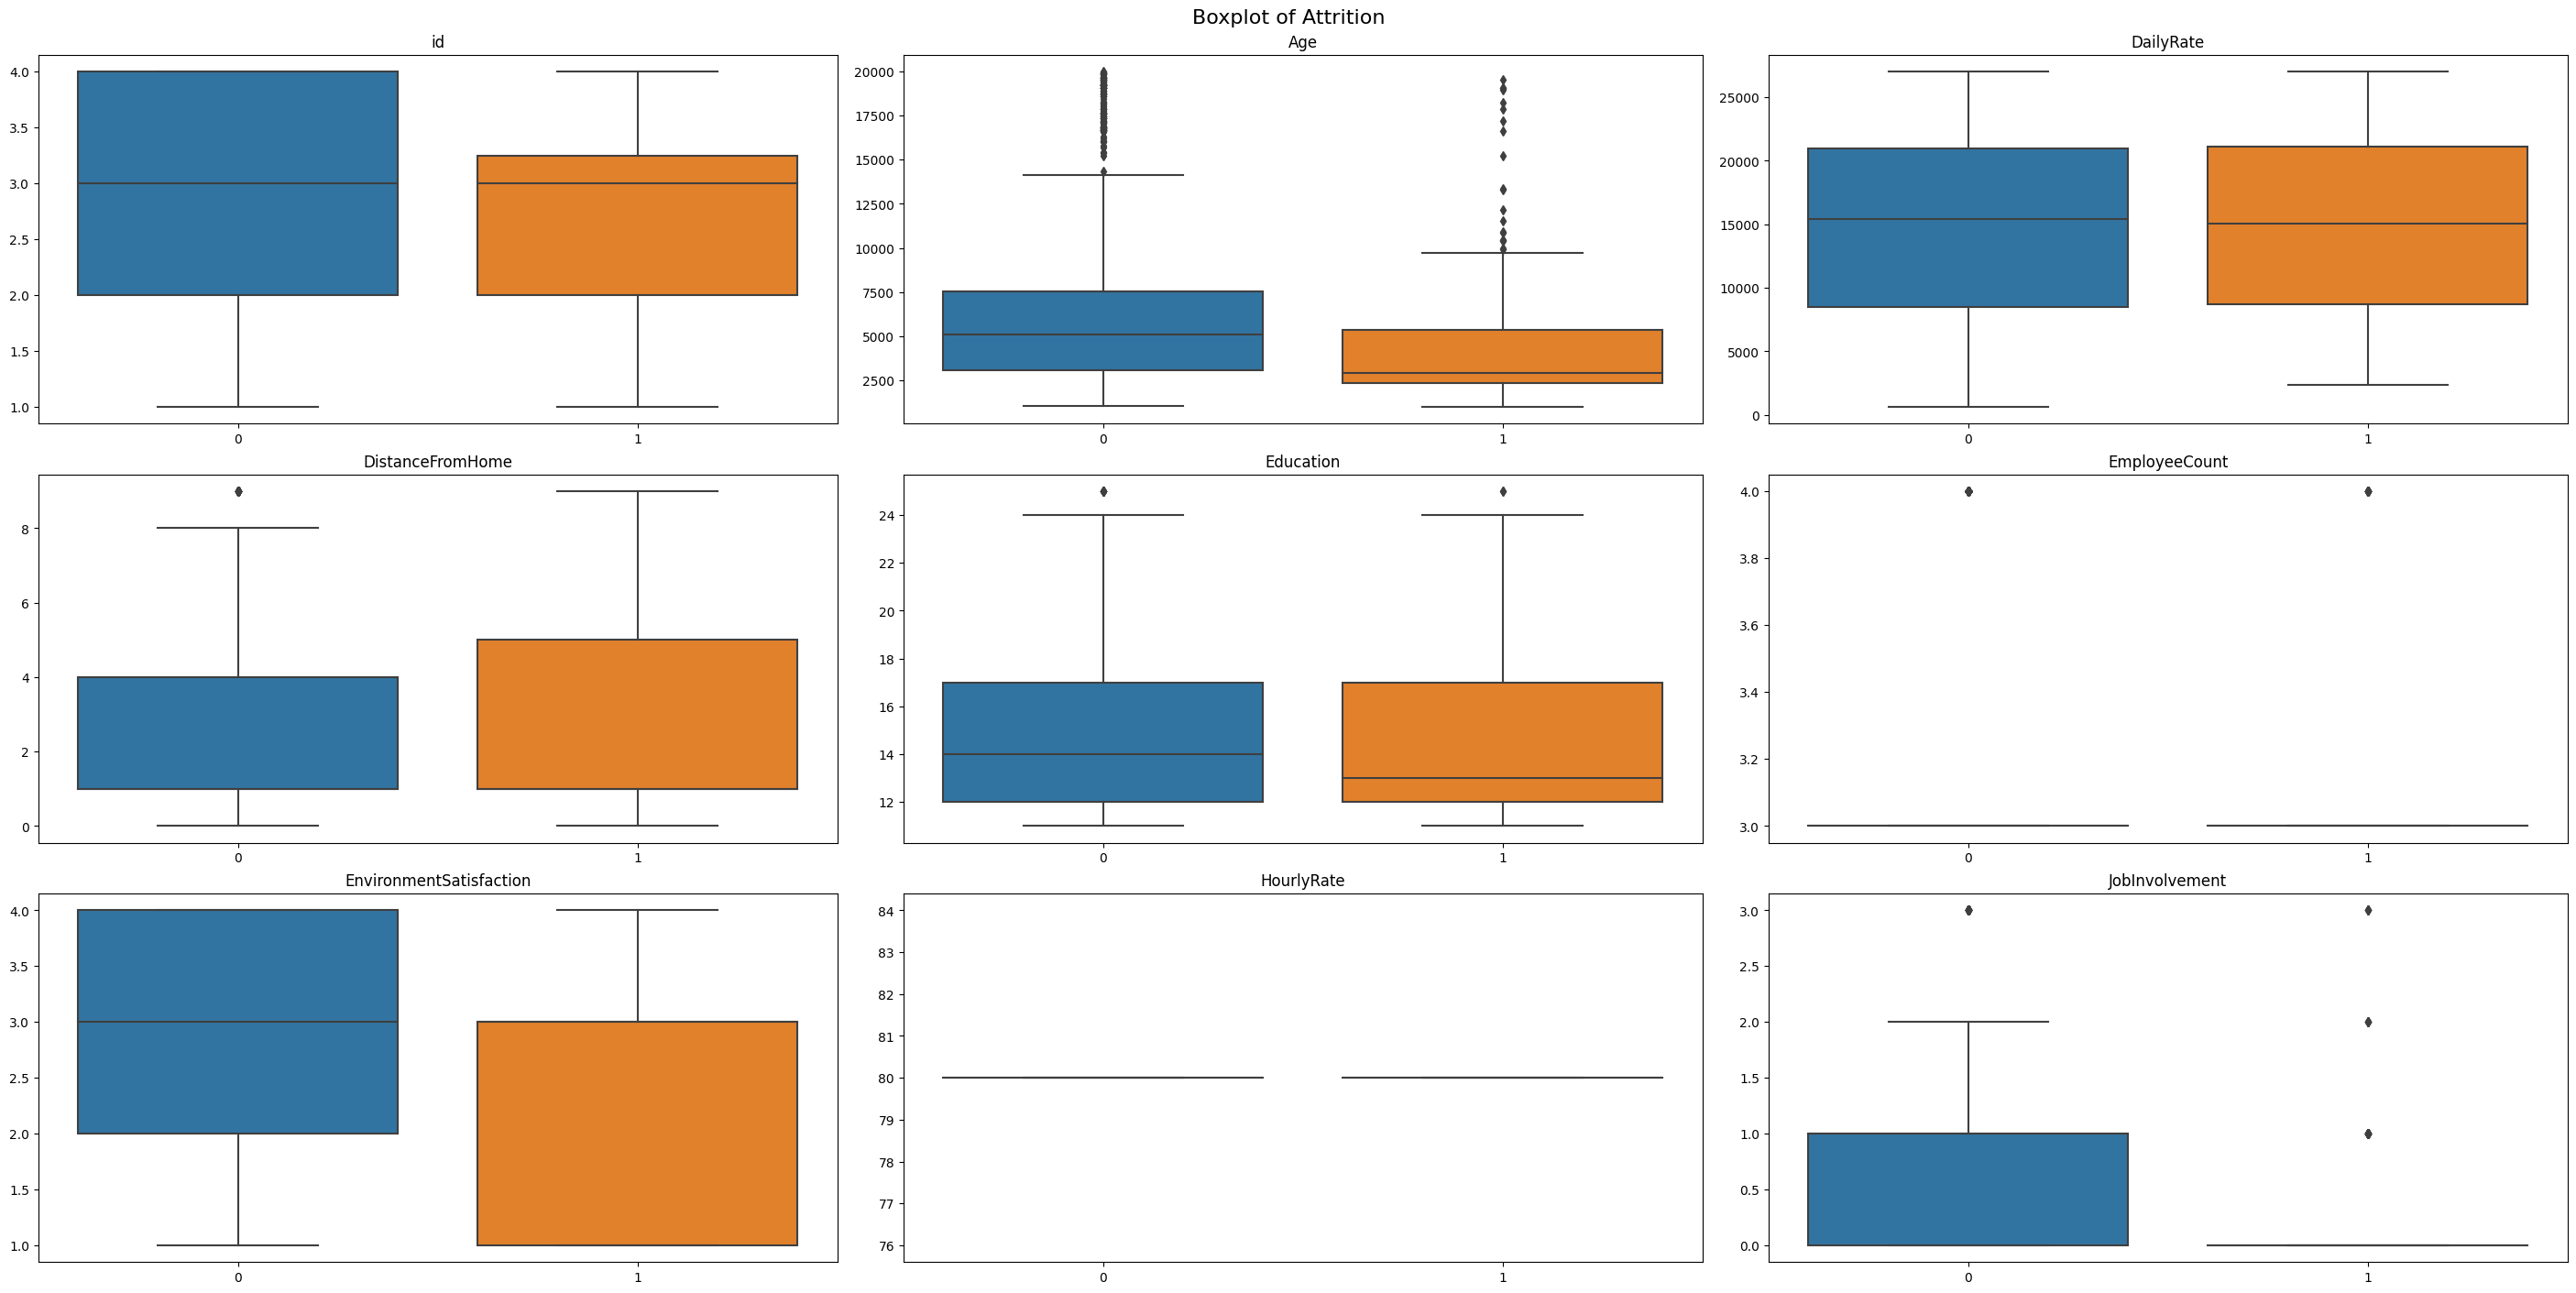

In [560]:
fig, ax = plt.subplots(3, 3, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=16)

for i in range(9):
    ax[i].set(title = cont_cols[i])
    sns.boxplot(x=train['Attrition'], y = train[cont_cols[i+10]], ax=ax[i]).set(xlabel=None,  ylabel=None)

plt.show()

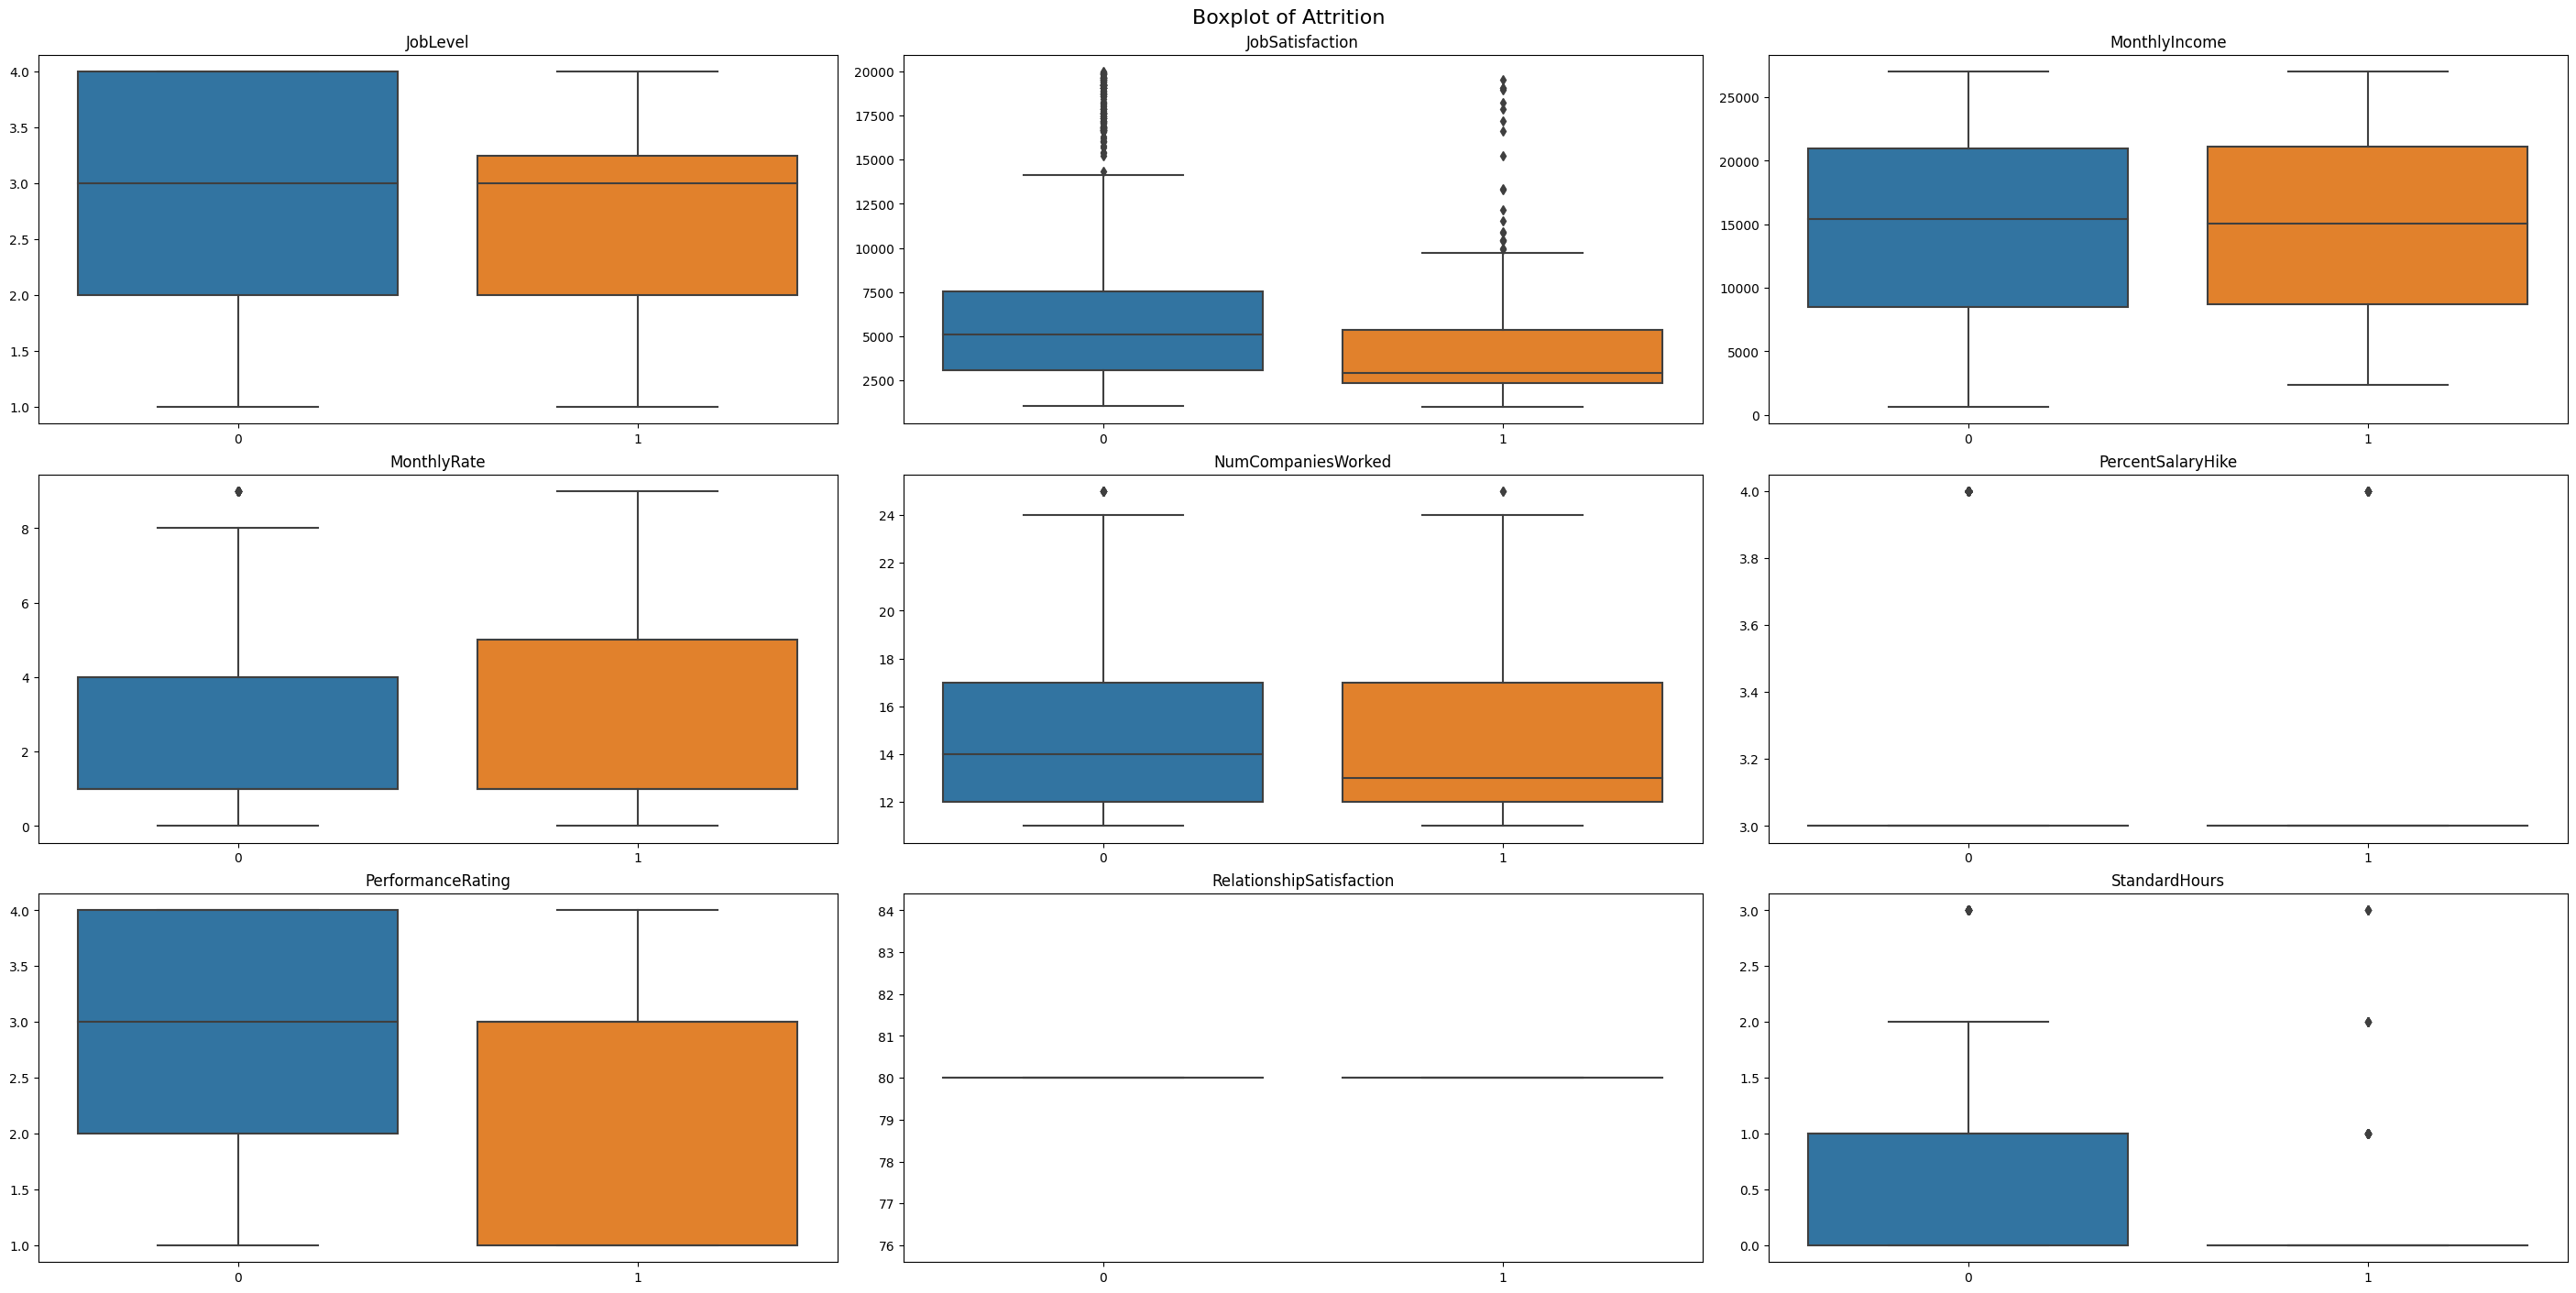

In [555]:
fig, ax = plt.subplots(3, 3, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=16)

for i in range(9):
    ax[i].set(title = cont_cols[i+9])
    sns.boxplot(x=train['Attrition'], y = train[cont_cols[i+10]], ax=ax[i]).set(xlabel=None,  ylabel=None)

plt.show()

In [556]:
train['StandardHours'].unique()

array([80])

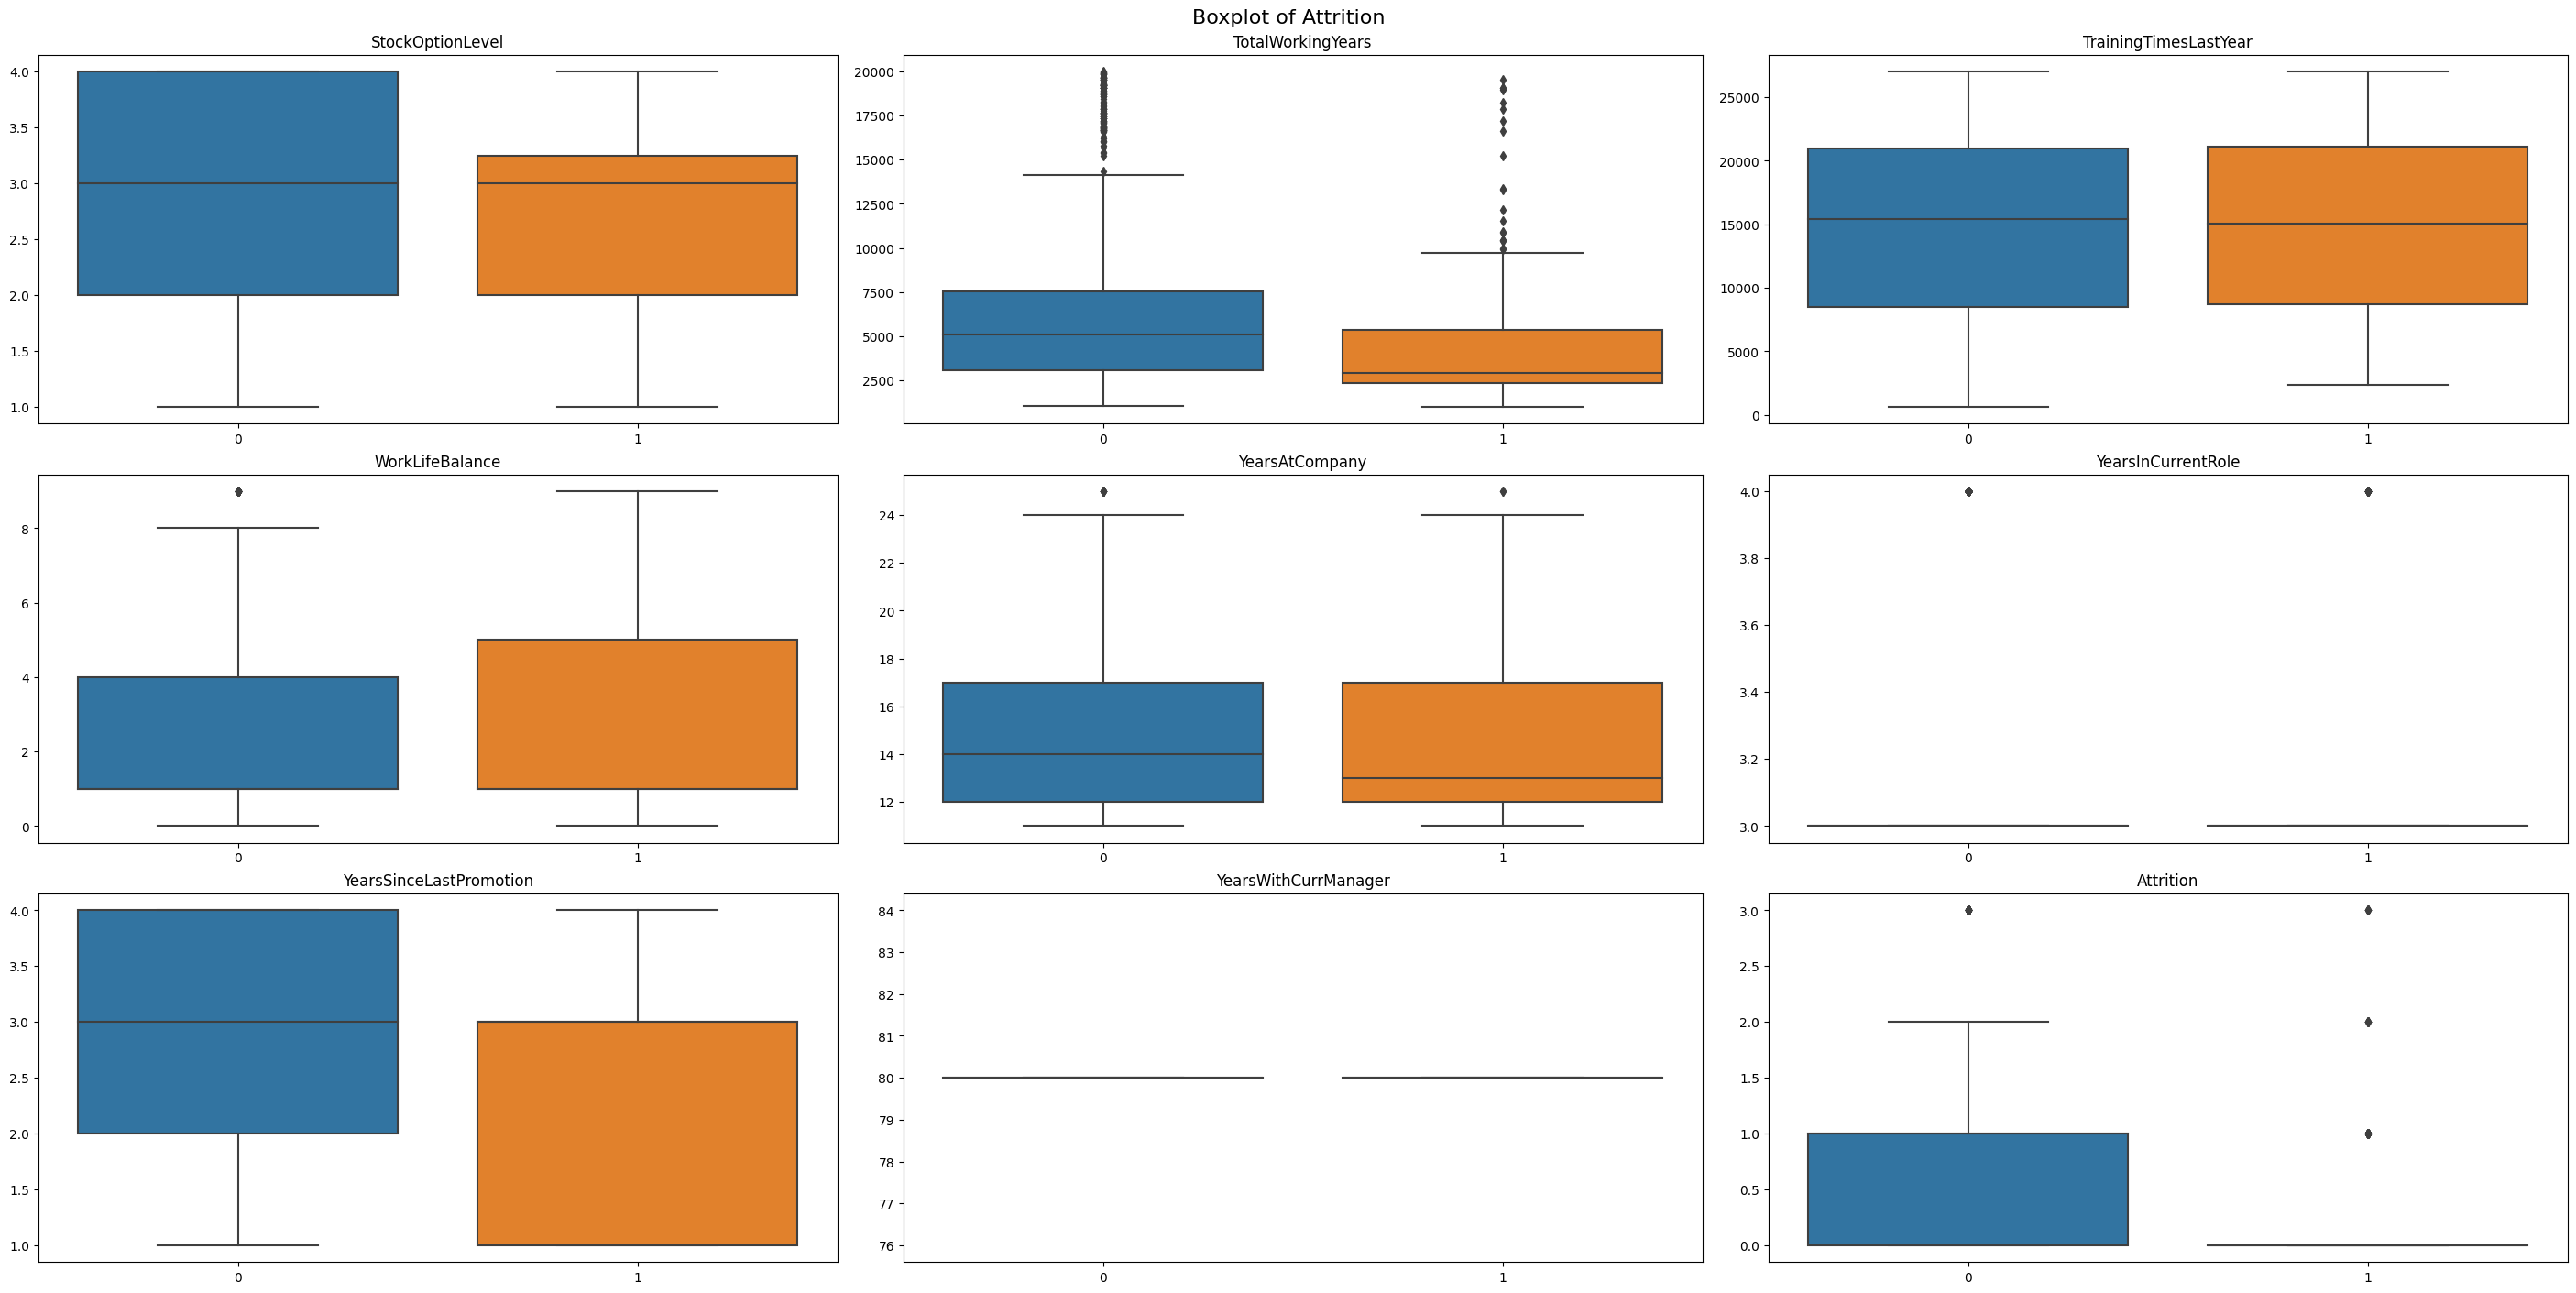

In [557]:
fig, ax = plt.subplots(3, 3, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=16)

for i in range(9):
    ax[i].set(title = cont_cols[i+18])
    sns.boxplot(x=train['Attrition'], y = train[cont_cols[i+10]], ax=ax[i]).set(xlabel=None,  ylabel=None)

plt.show()

In [561]:
train['EmployeeCount'].unique()

array([1])

In [562]:
test.drop(['EmployeeCount', 'StandardHours', 'Over18','id'], axis = 1, inplace = True)
train.drop(['EmployeeCount', 'StandardHours', 'Over18','id'], axis = 1, inplace = True)

In [570]:
train['Age'].unique()

array([36, 35, 32, 38, 50, 27, 34, 40, 51, 25, 29, 48, 26, 39, 33, 52, 42,
       30, 43, 24, 41, 47, 31, 56, 44, 28, 46, 18, 45, 37, 49, 53, 54, 23,
       59, 22, 55, 20, 57, 19, 21, 58, 60])

In [571]:
train['Age_cut'] = pd.cut(train['Age'], 5, labels=[0, 1, 2, 3, 4]).astype(object)


In [572]:
test['Age_cut'] = pd.cut(test['Age'], 5, labels=[0, 1, 2, 3, 4]).astype(object)

In [574]:
test.drop(['Age'], axis = 1, inplace = True)
train.drop(['Age'], axis = 1, inplace = True)

In [578]:
train['Age_cut'].unique()

array([2, 1, 3, 0, 4], dtype=object)